In [41]:
# Let's begin by importing what we'll need (You'll probably be copying and pasting this a lot)

# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules and libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook(Jupyter Notebook)
%matplotlib inline


- Kernel Density estimation plots is basically just a way to estimate the PDF, 
Probability Density Function of random variables

(0, 1)

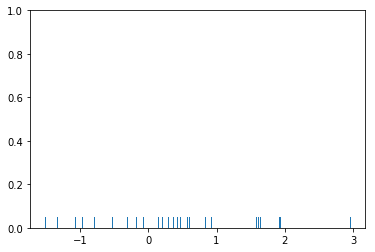

In [22]:
# Making a KDE plot manually
# Rug/Carpet plots put a tick wherever a value occurred 
dataset = randn(25)

sns.rugplot(dataset)

plt.ylim(0,1)   # setting your y-axis limit to better view the graph (brings graph into view)

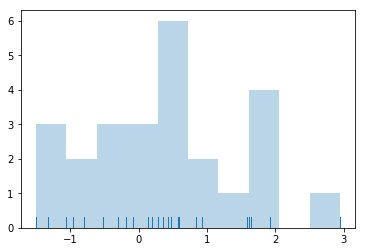

In [23]:
# Plotting a histogram of the above dataset
plt.hist(dataset,alpha=0.3)     # alpha sets the transparency, 0 = totally clear, 1 = opaque
# Histogram on top of rug-plot
sns.rugplot(dataset)

(0, 1)

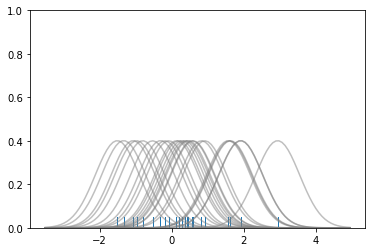

In [24]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    
    # Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel1 = kernel / kernel.max()
    kernel1 = kernel1 * 0.4
    
    plt.plot(x_axis,kernel1,color='grey',alpha=0.5)
    
plt.ylim(0,1)

Text(0.5,0.98,'Sum of the basis functions')

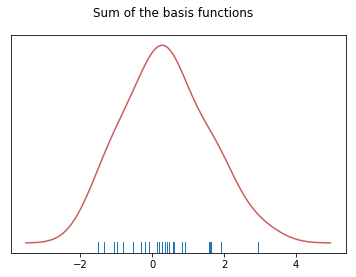

In [25]:
# To get the KDE plot, we need to sum all of these Gausian functions
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

# Using Seaborn To Plot A KDE

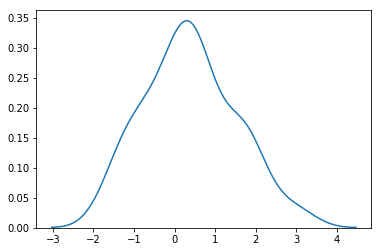

In [26]:
sns.kdeplot(dataset)

In [43]:
# Overall Objective: Adjusting the bandwidth of the seaborn KDE plot to make it more/less sensitive to high 
# frequency datasets

# Creating a rugplot
sns.rugplot(dataset,color='black')

# Plotting KDE plots for various bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,1w=1.8,label=bw)

SyntaxError: invalid syntax (<ipython-input-43-c313ffb02f62>, line 9)

In [35]:
url = 'http://wn.wikipedia.org/wiki/Kernel_(statistics)' 

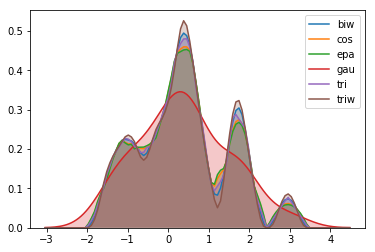

In [37]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

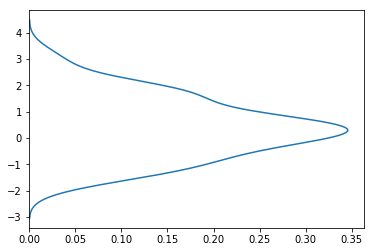

In [38]:
# Plotting on the vertical axis
sns.kdeplot(dataset,vertical=True)

In [39]:
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

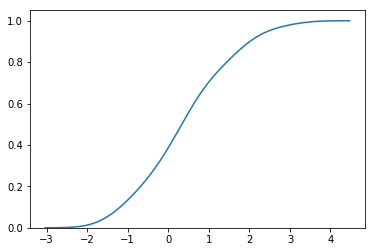

In [40]:
# Using a KDE plot to create a cumulative distribution function (cdf) of the data
sns.kdeplot(dataset,cumulative=True)

/Users/calvertlouden/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


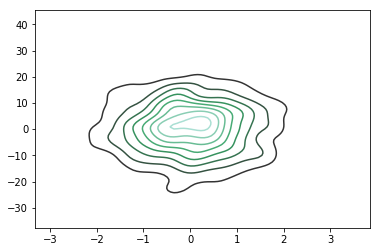

In [45]:
# KDE plots for multi-dimensional data, a multi-variate density estimation
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(dframe)

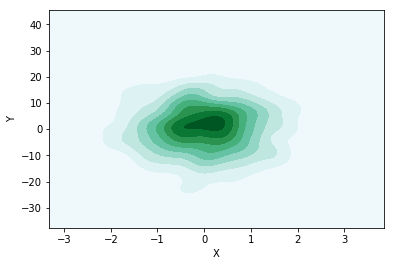

In [47]:
# This syntax corrects the error above: sns.kdeplot(data.X,data.Y)
sns.kdeplot(dframe.X,dframe.Y,shade=True)

/Users/calvertlouden/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


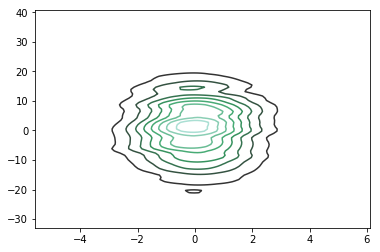

In [48]:
# Specifying bandwidths
sns.kdeplot(dframe,bw=1)

/Users/calvertlouden/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


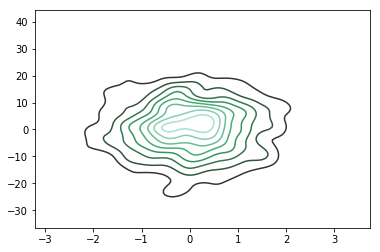

In [49]:
# Silverman estimation
sns.kdeplot(dframe,bw='silverman')

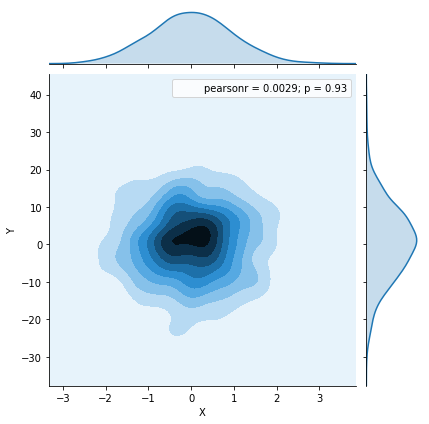

In [50]:
# KDE jointplot
sns.jointplot('X','Y',dframe,kind='kde')